In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
%matplotlib inline

In [7]:
df = pd.read_csv('explog_nicksess.csv')
df.head()

,Trial,Match,RotationA,RotationB,Correct,RT
0,1,False,45,105,True,3.053664
1,2,True,315,435,True,2.153025
2,3,False,135,195,True,1.408885
3,4,False,45,105,True,1.871476
4,5,False,315,375,True,1.859021


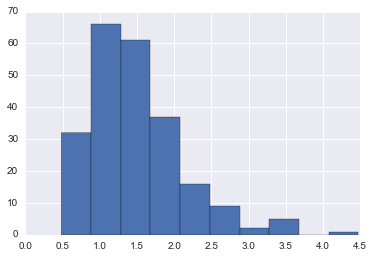

In [9]:
df.RT.hist()

Match
False    Axes(0.125,0.125;0.775x0.775)
True     Axes(0.125,0.125;0.775x0.775)
Name: RT, dtype: object

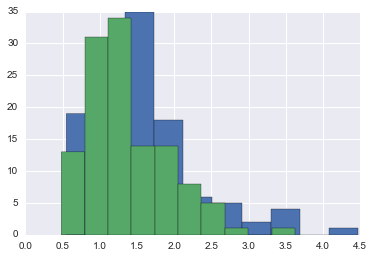

In [13]:
df.groupby('Match').RT.hist()

In [14]:
df['RotOffset'] = df['RotationB'] - df['RotationA']
df.head()

,Trial,Match,RotationA,RotationB,Correct,RT,RotOffset
0,1,False,45,105,True,3.053664,60
1,2,True,315,435,True,2.153025,120
2,3,False,135,195,True,1.408885,60
3,4,False,45,105,True,1.871476,60
4,5,False,315,375,True,1.859021,60


In [22]:
conds = df.groupby(('Match', 'RotOffset'))
conds.RT.aggregate([np.mean, np.std])

mean       std
Match RotOffset                    
False 60         1.502529  0.563982
      120        1.709928  0.820204
True  60         1.318907  0.557247
      120        1.423273  0.564578

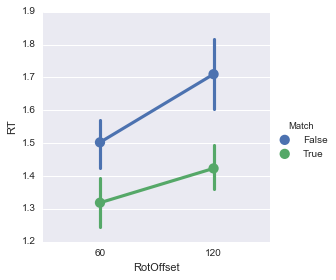

In [30]:
sns.factorplot(x='RotOffset', y='RT', hue='Match', jitter=True, data=df, ci=68)